#**Assignment 3** <br>
####**Problem Statement** <br>
Build a CNN to classify different breeds of snakes, and visualize the effect of CNN layers.<br>
**Data:**<br>
!wget
https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip<br>
**Task**
1. Read train.csv and segregate the dataframe by 90:10 training-validation ratio
2. Display 16 random breeds of snakes from training set
3. Load the training image generator with rescale using Image Data Generator of
Tensorflow, apply any two following augmentation,<br>
a. Rotation<br>
b. Shifting<br>
c. Horizontal Flip<br>
d. Shearing<br>
e. Zooming<br>
4. Load the validation images using Image Data Generator but with only rescale option
5. Build the CNN model
6. Create a custom callback function for the model, set the condition if the model exceeds
70% or 80% accuracy then stop training the model (Reference https://www.tensorflow.org/guide/keras/custom_callback )
7. Evaluate the validation set, compute F1 score and build confusion matrix
8. Visualize the effect of CNN layers on any image. Comment on the output layer images.
9. Display 10 random images with actual and predicted breed from validation set

In [1]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2022-08-10 13:17:57--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.28
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M   107MB/s    in 0.9s    

2022-08-10 13:17:58 (107 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [2]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/b70a166bfe.jpg  
  inflating: dataset/train/d31875b68e.jpg  
  inflating: dataset/train/22c66793fb.jpg  
  inflating: dataset/train/a468b1390f.jpg  
  inflating: dataset/train/9e43d2cedc.jpg  
  inflating: dataset/train/2e0299e991.jpg  
  inflating: dataset/train/e0b85d8ff1.jpg  
  inflating: dataset/train/6a651ec04a.jpg  
  inflating: dataset/train/46c87716a5.jpg  
  inflating: dataset/train/8c40d4f073.jpg  
  inflating: dataset/train/96e4fb744c.jpg  
  inflating: dataset/train/794a698960.jpg  
  inflating: dataset/train/dad1934f35.jpg  
  inflating: dataset/train/a1c66a2b3c.jpg  
  inflating: dataset/train/b62484a8e4.jpg  
  inflating: dataset/train/09462814f1.jpg  
  inflating: dataset/train/97dbdb4dd0.jpg  
  inflating: dataset/train/3bd7f56164.jpg  
  inflating: dataset/train/a2576a2fa1.jpg  
  inflating: dataset/train/f462f66aa6.jpg  
  inflating: dataset/train/740e1a7fca.jpg  
  inflating: dataset/trai

In [3]:
# Importing neccesary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
%matplotlib inline

###**Read train.csv and segregate the dataframe by 90:10 training-validation ratio**

In [4]:
train_df = pd.read_csv('/content/dataset/train.csv')

In [5]:
train_df.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [6]:
train_df.columns=['filename','class']
train_df.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [7]:
train = train_df.sample(frac = 0.9)
val = train_df.drop(train.index)

In [8]:
train.shape

(4957, 2)

In [9]:
val.shape

(551, 2)

In [10]:
train['filename'] = '/content/dataset/train/' + train['filename']
train.head()

,filename,class
5486,/content/dataset/train/8ab4f922a4,coluber-constrictor
3204,/content/dataset/train/1e830eeefe,nerodia-fasciata
3419,/content/dataset/train/121f53bf46,crotalus-viridis
4957,/content/dataset/train/62b3392339,nerodia-sipedon
270,/content/dataset/train/2e5b6de93d,crotalus-atrox


In [11]:
val['filename'] = '/content/dataset/train/' + val['filename']
val.head()

,filename,class
2,/content/dataset/train/929b99ea92,thamnophis-sirtalis
11,/content/dataset/train/d7c292df19,nerodia-sipedon
34,/content/dataset/train/7add42e9aa,pantherophis-obsoletus
35,/content/dataset/train/acd90c5154,storeria-dekayi
38,/content/dataset/train/2613988a93,coluber-constrictor


In [12]:
unique_features = train['class'].unique()
len(unique_features)

35

In [13]:
def append_ext(fn):
    return fn+".jpg"

train["filename"]=train["filename"].apply(append_ext)
train.head()

,filename,class
5486,/content/dataset/train/8ab4f922a4.jpg,coluber-constrictor
3204,/content/dataset/train/1e830eeefe.jpg,nerodia-fasciata
3419,/content/dataset/train/121f53bf46.jpg,crotalus-viridis
4957,/content/dataset/train/62b3392339.jpg,nerodia-sipedon
270,/content/dataset/train/2e5b6de93d.jpg,crotalus-atrox


In [14]:
def append_ext(fn):
    return fn+".jpg"

val["filename"]=val["filename"].apply(append_ext)
val.head()

,filename,class
2,/content/dataset/train/929b99ea92.jpg,thamnophis-sirtalis
11,/content/dataset/train/d7c292df19.jpg,nerodia-sipedon
34,/content/dataset/train/7add42e9aa.jpg,pantherophis-obsoletus
35,/content/dataset/train/acd90c5154.jpg,storeria-dekayi
38,/content/dataset/train/2613988a93.jpg,coluber-constrictor


In [15]:
sample_df = train.sample(16)
files = sample_df['filename'].tolist()
targets = sample_df['class'].tolist()

#**Visualizing the data**

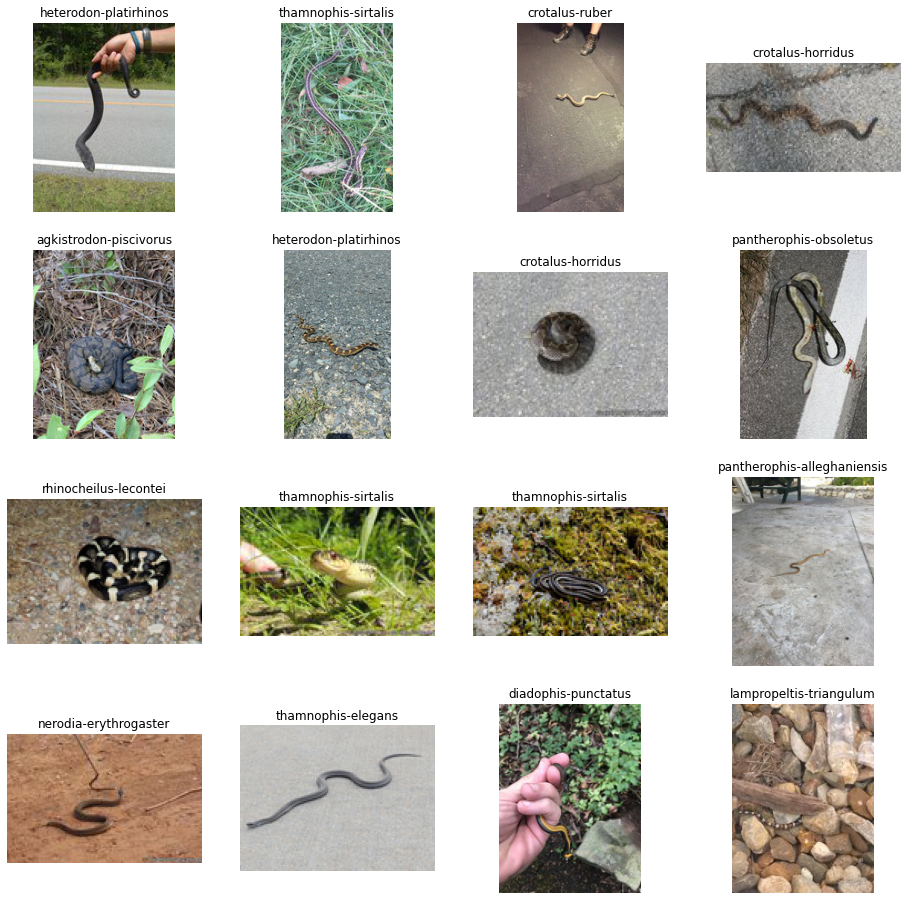

In [16]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows * 4,nrows * 4)

for i, (img_path, targets) in enumerate(zip(files,targets)):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(targets)

plt.show()

##**Image Augmentation**

In [17]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

Found 4957 validated image filenames belonging to 35 classes.
Found 551 validated image filenames belonging to 35 classes.


##**Building a CNN Model**

In [34]:
model = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
                                tf.keras.layers.MaxPooling2D(2,2),
                                tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                                tf.keras.layers.MaxPooling2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512, activation='relu'),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(len(unique_features), activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 492032)            0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [35]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Creating a custom call back for the model**

In [36]:
from keras.callbacks import Callback

In [37]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.80):
            print("\nReached 80% accuracy -> training stopped")
            self.model.stop_training = True

In [38]:
callbacks = myCallback()

In [39]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[callbacks])

Epoch 1/20
155/155 [==============================] - 79s 502ms/step - loss: 3.9098 - accuracy: 0.0777 - val_loss: 3.4469 - val_accuracy: 0.0762
Epoch 2/20
155/155 [==============================] - 77s 497ms/step - loss: 3.3916 - accuracy: 0.0938 - val_loss: 3.3545 - val_accuracy: 0.0726
Epoch 3/20
155/155 [==============================] - 77s 496ms/step - loss: 3.3664 - accuracy: 0.0956 - val_loss: 3.3449 - val_accuracy: 0.0780
Epoch 4/20
155/155 [==============================] - 78s 500ms/step - loss: 3.3622 - accuracy: 0.0958 - val_loss: 3.3400 - val_accuracy: 0.0853
Epoch 5/20
155/155 [==============================] - 77s 496ms/step - loss: 3.3637 - accuracy: 0.0974 - val_loss: 3.3420 - val_accuracy: 0.0871
Epoch 6/20
155/155 [==============================] - 78s 503ms/step - loss: 3.3596 - accuracy: 0.0982 - val_loss: 3.3389 - val_accuracy: 0.0907
Epoch 7/20
155/155 [==============================] - 82s 528ms/step - loss: 3.3605 - accuracy: 0.0982 - val_loss: 3.3378 - val_ac

In [41]:
model.evaluate(val_generator)

18/18 [==============================] - 1s 63ms/step - loss: 3.3136 - accuracy: 0.0998


[3.313593864440918, 0.09981851279735565]

##**Computing F1 score and building confusion matrix**

In [54]:
prob = model.predict(val_generator)
pred = np.argmax(prob, axis=1)

In [59]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print(confusion_matrix(val_generator.classes, pred))

[[ 0  0  0 ...  0  0 11]
 [ 0  0  0 ...  0  0 12]
 [ 0  0  0 ...  0  0 11]
 ...
 [ 0  0  0 ...  0  0  8]
 [ 0  0  0 ...  0  0 10]
 [ 0  0  0 ...  0  0 35]]


In [62]:
print("F-1 Score=", np.round(f1_score(val_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.018


In [45]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())

In [65]:
pred_labels = [] 
actuals = []
pred = np.argmax(model.predict(val_generator), axis=1)
for i in range(551):
    pred_labels.append(labels[pred[i]])
    actuals.append(labels[val_generator.classes[i]])

In [66]:
val_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
val_df['file'] = val_generator.filenames
val_df['pred_labels'] = pred_labels
val_df['actuals'] = actuals
val_df.head()

,file,pred_labels,actuals
0,/content/dataset/train/929b99ea92.jpg,crotalus-atrox,thamnophis-sirtalis
1,/content/dataset/train/d7c292df19.jpg,thamnophis-sirtalis,nerodia-sipedon
2,/content/dataset/train/7add42e9aa.jpg,lampropeltis-californiae,pantherophis-obsoletus
3,/content/dataset/train/acd90c5154.jpg,thamnophis-sirtalis,storeria-dekayi
4,/content/dataset/train/2613988a93.jpg,thamnophis-sirtalis,coluber-constrictor


In [67]:
sample = pd.DataFrame(val_df.sample(10))

##**Visualizing the effect of CNN layers on a image.**

In [42]:
files[5]

'/content/dataset/train/6ad05cf7a8.jpg'

(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(1, 127, 127, 64)
(1, 125, 125, 128)
(1, 62, 62, 128)


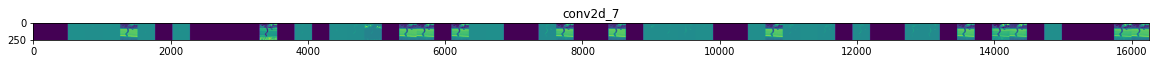

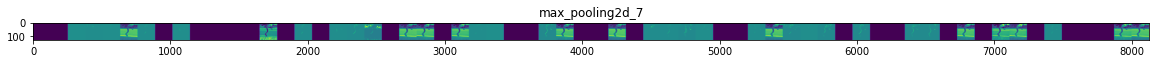

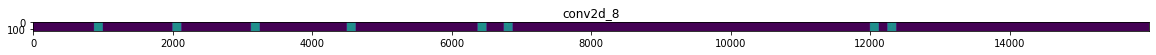

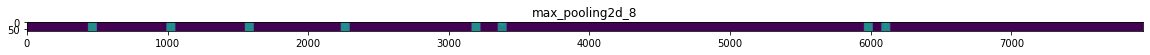

In [75]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[0], target_size=(256, 256))
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        print(feature_map.shape)
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

##**Visualizing Predictions**

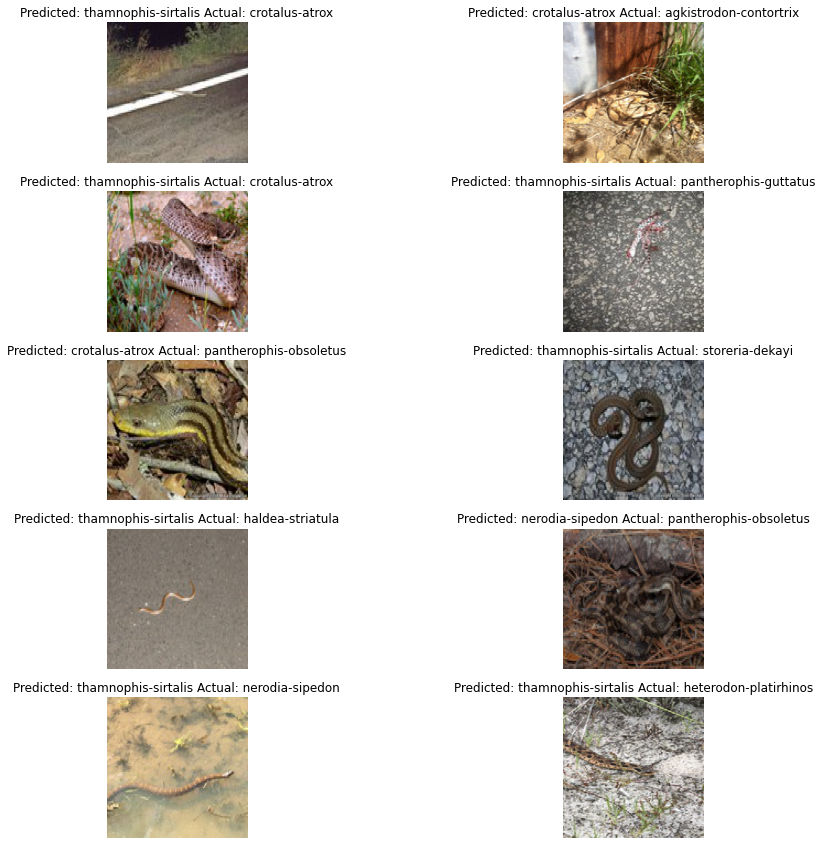

In [74]:
j=1
plt.figure(figsize=(15,15))
for i in sample.index:

  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(sample['file'][i], target_size = (256, 256))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted: " + val_df['pred_labels'][i] + " Actual: " + val_df['actuals'][i])
  j+=1